In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from numba import jit
import networkx as nx

%precision 5

'%.5f'

In [2]:
df=pd.read_csv("cases_100locations_first77days.txt", delimiter=' ')
df1=pd.read_csv("net1.txt", delimiter=' ', header=None)
df2=pd.read_csv("net2.txt", delimiter=' ', header=None)

In [3]:
# building adjacency matrix 1
net1 = np.zeros(shape=(max(df1[1])+1, max(df1[1]+1 )), dtype='int32')
for i1,i2 in zip(df1[0],df1[1]):
    net1[i1][i2] = 1
    net1[i2][i1] = 1

# building adjacency matrix 2
net2 = np.zeros(shape=(max(df2[1])+1, max(df2[1]+1 )), dtype='int32')
for i1,i2 in zip(df2[0],df2[1]):
    net2[i1][i2] = 1
    net2[i2][i1] = 1
    # net2 is explitely symmetric

G1 = nx.from_numpy_matrix(net1)
G2 = nx.from_numpy_matrix(net2)

# Task 1

In [4]:
#deg1 = np.array(G1.degree())[:,1]
deg1 = np.array(G1.degree())
deg2 = np.array(G2.degree())

k1_avg    = np.mean(deg1[:,1])
k1_sq_avg = np.mean(deg1[:,1]**2)

k2_avg    = np.mean(deg2[:,1])
k2_sq_avg = np.mean(deg2[:,1]**2)

µ = 0.5


# Homogeneous case
λ1_c_ho = µ/k1_avg
λ2_c_ho = µ/k2_avg

# Heterogeneous case
λ1_c_he = µ*k1_avg/k1_sq_avg
λ2_c_he = µ*k2_avg/k2_sq_avg

# Quenced case

# Evaluating eigenvalues
max_eig_1 = np.real(max(np.linalg.eigvals(net1)))
max_eig_2 = np.real(max(np.linalg.eigvals(net2)))

λ1_c_qu = µ/max_eig_1
λ2_c_qu = µ/max_eig_2

In [5]:
# printing the minima of the degrees to verify that every node is connected at least with another 1
print("The minimum degree of 1st net is:\t", min(deg1[:,1]))
print("\nThe minimum degree of 2nd net is:\t", min(deg2[:,1]))
print("\nThe minimum degree of 1st net is:\t", max(deg1[:,1]))
print("\nThe minimum degree of 2nd net is:\t", max(deg2[:,1]))

The minimum degree of 1st net is:	 1

The minimum degree of 2nd net is:	 2

The minimum degree of 1st net is:	 14

The minimum degree of 2nd net is:	 30


In [6]:
print("Net1, homogeneous case:\t\t", λ1_c_ho)
print("Net2, homogeneous case:\t\t", λ2_c_ho)
print("\nNet1, heterogeneous case:\t", λ1_c_he)
print("Net2, heterogeneous case:\t", λ2_c_he)
print("\nNet1, quenched case:\t\t", λ1_c_qu)
print("Net2, quenched case:\t\t", λ2_c_qu)

Net1, homogeneous case:		 0.0971628449280995
Net2, homogeneous case:		 0.13919821826280623

Net1, heterogeneous case:	 0.08160482080558198
Net2, heterogeneous case:	 0.07587663709336713

Net1, quenched case:		 0.07956585298798928
Net2, quenched case:		 0.06639959697244081


# Task 2

In [8]:
# Defining the function to verify all possible edges in which there can be an infection
def possible_infection_contacts(prova, G1):
    possible = []
    for edge in G1.edges:
        #print(edge)
        if (prova[edge[0]] != prova[edge[1]]):
            possible.append(edge)
    return possible

In [9]:
# definying the function to do the simulations
def simulation(G, initial_percentage=1, λ_test=1, cycles=5):
    my_SIS = np.zeros(1000) # creating environment

    avg_I_list = []

    cicle = 0

    for cicle in range(cycles):
    
        config_list = []
        time_list = [0]
        I_list=[]
        my_SIS = np.zeros(1000) # creating environment
        
        # Initializing with a random infected
        # here, in the parameter "size" one can regulate the percentage of initial infected
        my_SIS[np.random.choice(np.arange(len(my_SIS)), size = initial_percentage*len(G)/100, replace=False)] = 1
        
        config_list.append(my_SIS.copy())

        flag = True
        
        my_count = 
        
        #for my_count in range(10000):
        while ( (my_count<5000) and (flag) ):
            my_count += 1
            
            # getting all possible infectious events
            possible_infect = possible_infection_contacts(my_SIS, G)

            a_λ = λ_test*len(possible_infect)  # evaluating the propensity rate of infection
            a_µ = µ * np.sum(my_SIS)           # evaluating the propensity rate of getting healed

            a_0 = a_λ + a_µ                    # total propensity rate

            # Time of next episode
            δt_Gill = np.random.exponential(scale = 1/a_0)

            # chosing who change
            choice = np.random.uniform(low = 0.0, high = a_0)

            if (choice < a_λ):
                # selecting one edge
                infect_edge = np.random.randint(low = 0, high = len(possible_infect))
                # infecting both nodes of the edge (one is already infected, so we are infecting only 1 new individual)
                my_SIS[possible_infect[infect_edge][0]] = 1
                my_SIS[possible_infect[infect_edge][1]] = 1
            else:
                # 1 infected getting heal
                my_SIS[np.random.choice(np.nonzero(my_SIS)[0])] = 0

            # fraction of infected I=np.sum(np.nonzero(my_SIS))
            I_list.append(np.sum(np.nonzero(my_SIS)[0]))
            config_list.append(my_SIS.copy())
            time_list.append(δt_Gill)
            
            if (np.sum(my_SIS) == 0):
                flag = False

        if (np.sum(my_SIS) == 0):
            avg_I_list.append(0)
        else:
            avg_I_list.append(np.sum(config_list[-1000:])/1000)

        my_time = []
        for index in range(len(time_list)):
            my_time.append(np.sum(time_list[:index+1]))
    
    return avg_I_list

## Important: see apendix for simulation runs

## Opening files created by simulations

## Initial condition: 1 infected

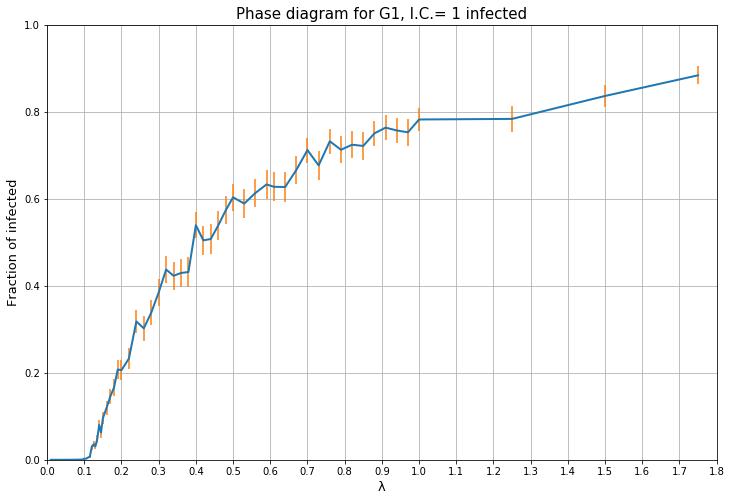

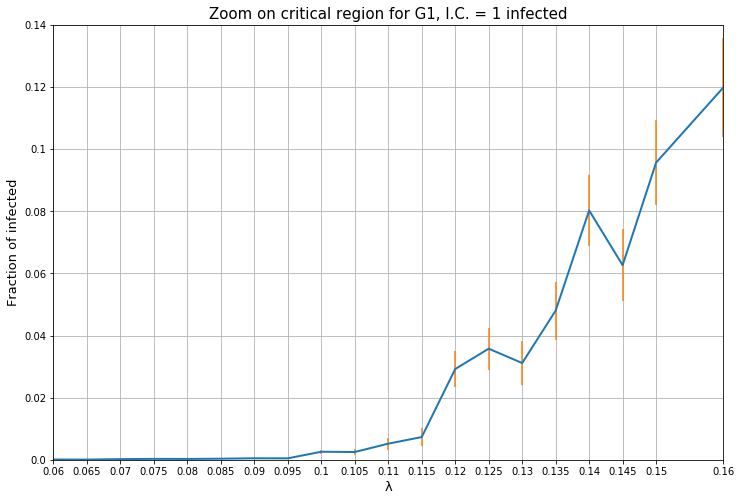

In [72]:
res = []
res.append(pd.read_csv("Temp_results/Graph1_100/res1_100", delimiter=" ", header = None))
res.append(pd.read_csv("Temp_results/Graph1_100/res2_100", delimiter=" ", header = None))
res.append(pd.read_csv("Temp_results/Graph1_100/res3_100", delimiter=" ", header = None))
res.append(pd.read_csv("Temp_results/Graph1_100/res4_100", delimiter=" ", header = None))


res_tot = pd.concat(res, axis=0)

res_sort = res_tot.sort_values([0])

to_plot = np.array(res_sort)

plt.figure(figsize=(12,8))
plt.plot(to_plot[:,0], np.array(to_plot[:,1]), lw=2)
plt.errorbar(to_plot[:,0], np.array(to_plot[:,1]), yerr=to_plot[:,2]/10, fmt='none')

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G1, I.C.= 1 infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()

# Zoom on critical region
plt.figure(figsize=(12,8))
plt.plot(to_plot[:,0], to_plot[:,1], lw=2)
plt.errorbar(to_plot[:,0], np.array(to_plot[:,1]), yerr=to_plot[:,2]/10, fmt='none')

lambda_labels = []
for i in to_plot[:,0]:
    lambda_labels.append(str(np.round(i, decimals=3)))

plt.xticks(to_plot[:,0], labels=lambda_labels)
plt.yticks(np.linspace(0, 140, 8), labels = np.round(np.linspace(0, 0.14, 8), decimals = 3))

plt.xlim([0.06, 0.16])
plt.ylim([0, 140])

plt.title("Zoom on critical region for G1, I.C. = 1 infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

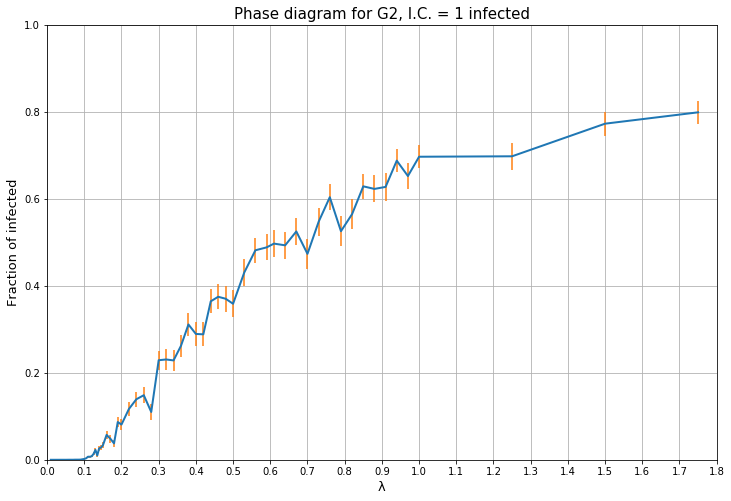

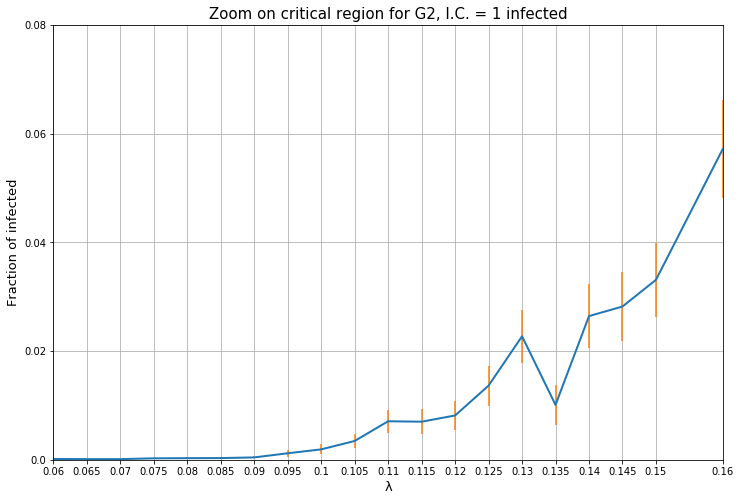

In [73]:
res = []
res.append(pd.read_csv("Temp_results/Graph2_100/res1_100", delimiter=" ", header = None))
res.append(pd.read_csv("Temp_results/Graph2_100/res2_100", delimiter=" ", header = None))
res.append(pd.read_csv("Temp_results/Graph2_100/res3_100", delimiter=" ", header = None))
res.append(pd.read_csv("Temp_results/Graph2_100/res4_100", delimiter=" ", header = None))


res_tot = pd.concat(res, axis=0)

res_sort = res_tot.sort_values([0])

to_plot = np.array(res_sort)

plt.figure(figsize=(12,8))
plt.plot(to_plot[:,0], to_plot[:,1], lw=2)
plt.errorbar(to_plot[:,0], np.array(to_plot[:,1]), yerr=to_plot[:,2]/10, fmt='none')

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G2, I.C. = 1 infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()

# Zoom on critical region
plt.figure(figsize=(12,8))
plt.plot(to_plot[:,0], to_plot[:,1], lw=2)
plt.errorbar(to_plot[:,0], np.array(to_plot[:,1]), yerr=to_plot[:,2]/10, fmt='none')

plt.xticks(to_plot[:,0], labels=np.round(to_plot[:,0], decimals=3) )
plt.yticks(np.linspace(0, 80, 5), labels = np.linspace(0, 0.08, 5))

plt.ylim([0, 80])
plt.xlim([0.06, 0.16])

plt.title("Zoom on critical region for G2, I.C. = 1 infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

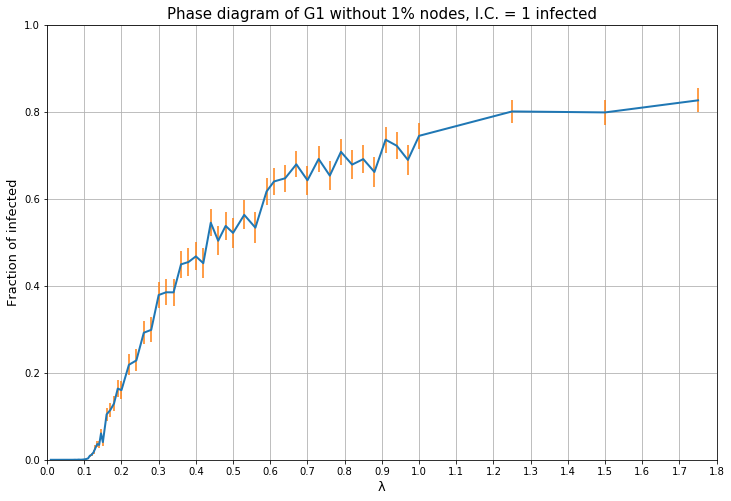

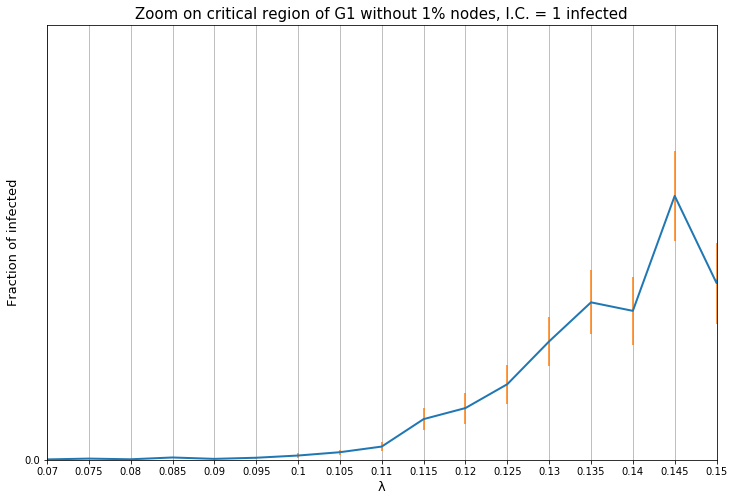

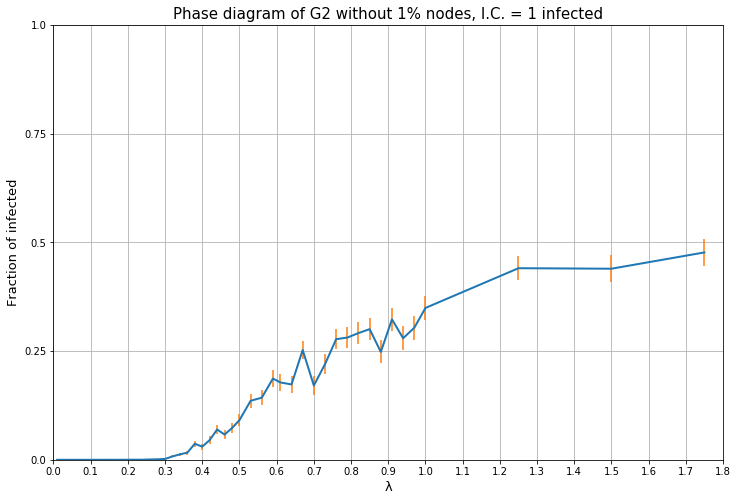

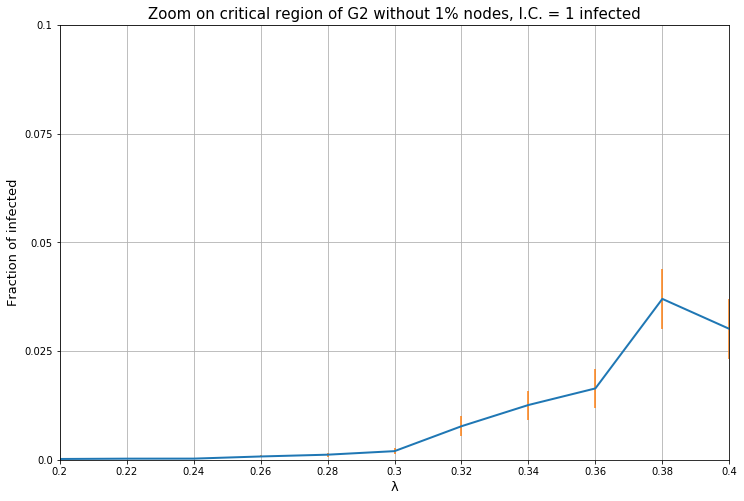

In [26]:
simul_g1_t = []
simul_g2_t = []

simul_g1_t.append(pd.read_csv("Temp_results/Graph1_100/vec1_100_thr_t4", delimiter="\t", header = None))
λ_list_g1_1_t = np.array([0.01, 0.05, 0.075, 0.095, 0.115, 0.135, 0.16, 0.2, 0.28, 0.36, 0.44,
                    0.53, 0.64, 0.76, 0.88, 1.0, 0.02, 0.06, 0.08, 0.1, 0.12, 0.14, 0.17, 0.22,
                    0.30, 0.38, 0.46, 0.56, 0.67, 0.79, 0.91, 1.25])
simul_g1_t.append(pd.read_csv("Temp_results/Graph1_100/vec2_100_thr_t4", delimiter="\t", header = None))
λ_list_g1_2_t = np.array([0.03, 0.065, 0.085, 0.105, 0.125, 0.145, 0.18, 0.24, 0.32, 0.40, 0.48,
                    0.59, 0.70, 0.82, 0.94, 1.5, 0.04, 0.07, 0.09, 0.11, 0.13, 0.15, 0.19, 0.26,
                    0.34, 0.42, 0.5, 0.61, 0.73, 0.85, 0.97, 1.75])

simul_g2_t.append(pd.read_csv("Temp_results/Graph2_100/vec1_100_thr_t4", delimiter="\t", header = None))
λ_list_g2_1_t = np.array([0.01, 0.05, 0.075, 0.095, 0.115, 0.135, 0.16, 0.2, 0.28, 0.36, 0.44,
                    0.53, 0.64, 0.76, 0.88, 1.0, 0.02, 0.06, 0.08, 0.1, 0.12, 0.14, 0.17, 0.22,
                    0.30, 0.38, 0.46, 0.56, 0.67, 0.79, 0.91, 1.25])
simul_g2_t.append(pd.read_csv("Temp_results/Graph2_100/vec2_100_thr_t4", delimiter="\t", header = None))
λ_list_g2_2_t = np.array([0.03, 0.065, 0.085, 0.105, 0.125, 0.145, 0.18, 0.24, 0.32, 0.40, 0.48,
                    0.59, 0.70, 0.82, 0.94, 1.5, 0.04, 0.07, 0.09, 0.11, 0.13, 0.15, 0.19, 0.26,
                    0.34, 0.42, 0.5, 0.61, 0.73, 0.85, 0.97, 1.75])

res1_t_list = []
res2_t_list = []

# building results for graph1 after deleting some nodes
for la,li in zip(λ_list_g1_1_t, np.array(simul_g1_t[0])):
    res1_t_list.append([la, li])
for la,li in zip(λ_list_g1_2_t, np.array(simul_g1_t[1])):
    res1_t_list.append([la, li])

# building results for graph2 after deleting some nodes
for la,li in zip(λ_list_g2_1_t, np.array(simul_g2_t[0])):
    res2_t_list.append([la, li])
for la,li in zip(λ_list_g2_2_t, np.array(simul_g2_t[1])):
    res2_t_list.append([la, li])


# building list of results to be plotted:
# lambda | average | std |
#
# Graph 1
for ele, index in zip(res1_t_list, range(len(res1_t_list))):
    res1_t_list[index].append((np.std(ele[1])))
    res1_t_list[index][1] = np.mean(ele[1])                     # Overwritting the vector of results to
                                                                #  be able to transform the list in a np array

# Graph 2
for ele, index in zip(res2_t_list, range(len(res2_t_list))):
    res2_t_list[index].append((np.std(ele[1])))
    res2_t_list[index][1] = np.mean(ele[1])

res1_t_list = np.array(res1_t_list)
res2_t_list = np.array(res2_t_list)

res1_t_list[np.isnan(res1_t_list)] = 0
res2_t_list[np.isnan(res2_t_list)] = 0

# sorting the arrays w.r.t. λ, in a way such that the rows are preserved
res1_t_plot = res1_t_list[np.lexsort((res1_t_list[:,1], res1_t_list[:,0]) )]
res2_t_plot = res2_t_list[np.lexsort((res2_t_list[:,1], res2_t_list[:,0]) )]


# Plotting G1
plt.figure(figsize = (12, 8))
plt.title("Graph1")
plt.plot(res1_t_plot[:,0], res1_t_plot[:,1], lw=2)
plt.errorbar(res1_t_plot[:,0], res1_t_plot[:,1], yerr=res1_t_plot[:,2]/10, fmt='none')

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals=3) )

plt.ylim([0, 1000])
plt.xlim([0., 1.8])

plt.title("Phase diagram of G1 without 1% nodes, I.C. = 1 infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()


# Plotting G1 zoom
plt.figure(figsize = (12, 8))
plt.title("Graph1")
plt.plot(res1_t_plot[:,0], res1_t_plot[:,1], lw=2)
plt.errorbar(res1_t_plot[:,0], res1_t_plot[:,1], yerr=res1_t_plot[:,2]/10, fmt='none')

plt.xticks(to_plot[:,0], labels=np.round(to_plot[:,0], decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals=3) )

plt.ylim([0, 100])
plt.xlim([0.07, 0.15])

plt.title("Zoom on critical region of G1 without 1% nodes, I.C. = 1 infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()


# Plotting G2
plt.figure(figsize = (12, 8))
plt.plot(res2_t_plot[:,0], res2_t_plot[:,1], lw=2)
plt.errorbar(res2_t_plot[:,0], res2_t_plot[:,1], yerr=res2_t_plot[:,2]/10, fmt='none')

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 5), labels = np.round(np.linspace(0, 1, 5), decimals=3) )

plt.ylim([0, 1000])
plt.xlim([0., 1.8])

plt.title("Phase diagram of G2 without 1% nodes, I.C. = 1 infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()


# Plotting G2 zoom
plt.figure(figsize = (12, 8))
plt.plot(res2_t_plot[:,0], res2_t_plot[:,1], lw=2)
plt.errorbar(res2_t_plot[:,0], res2_t_plot[:,1], yerr=res2_t_plot[:,2]/10, fmt='none')

plt.xticks(to_plot[:,0], labels=np.round(to_plot[:,0], decimals=3) )
plt.yticks(np.linspace(0, 100, 5), labels = np.round(np.linspace(0, 0.1, 5), decimals=3) )

plt.ylim([0, 100])
plt.xlim([0.2, 0.4])

plt.title("Zoom on critical region of G2 without 1% nodes, I.C. = 1 infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

## Initial condition: 10% infected

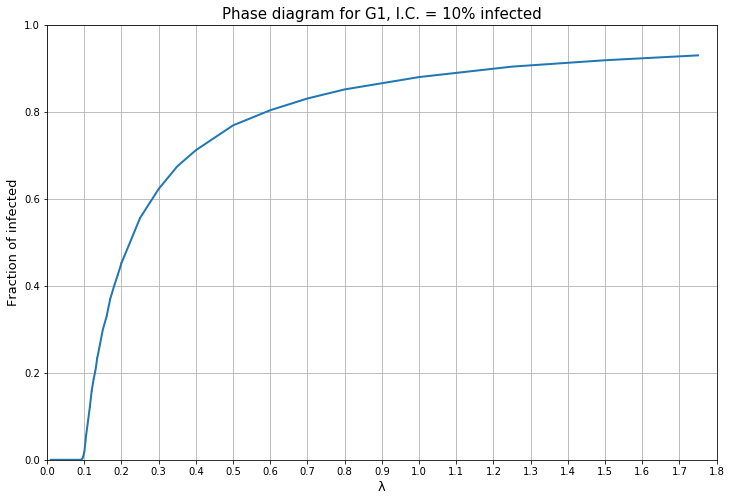

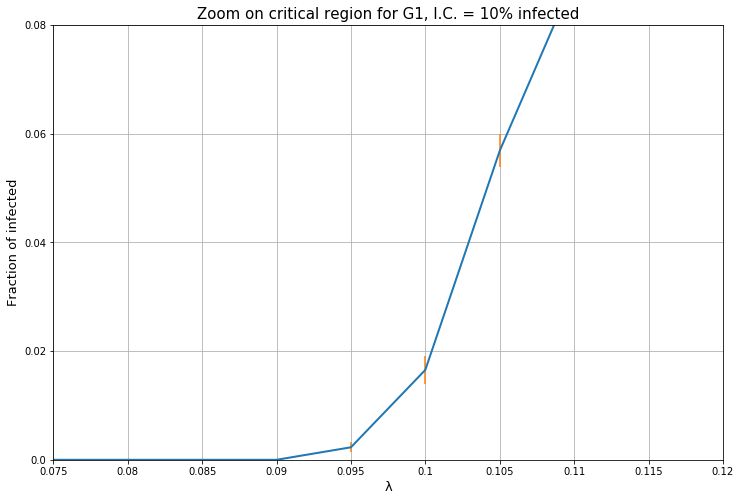

In [74]:
results1 = np.load("Temp_results/Graph1_100/vec_G1_100_10%_part1.npy")
results2 = np.load("Temp_results/Graph1_100/vec_G1_100_10%_part2.npy")
results3 = np.load("Temp_results/Graph1_100/vec_G1_100_10%_part3.npy")
results4 = np.load("Temp_results/Graph1_100/vec_G1_100_10%_part4.npy")

results_tot = np.concatenate([results1, results2, results3, results4])

λ_tot = np.array([0.01, 0.050, 0.075, 0.095, 0.115, 0.135, 0.170, 0.25, 0.5, 1.00,
                   0.02, 0.060, 0.080, 0.100, 0.120, 0.140, 0.180, 0.30, 0.6, 1.25,
                   0.03, 0.065, 0.085, 0.105, 0.125, 0.150, 0.190, 0.35, 0.7, 1.50,
                   0.04, 0.070, 0.090, 0.110, 0.130, 0.160, 0.200, 0.40, 0.8, 1.75])

results = np.zeros((40, 3))

for ele, l, lambd in zip(results, results_tot, λ_tot):   # results is build in appropriate way
    ele[0] = lambd
    ele[1] = np.mean(l)
    ele[2] = np.std(l)/10

results[:,1] = results[:,1][np.argsort(results[:,0])]
results[:,2] = results[:,2][np.argsort(results[:,0])]
results[:,0] = results[:,0][np.argsort(results[:,0])]

plt.figure(figsize=(12, 8))
plt.plot(results[:,0], results[:,1], lw=2)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='none')

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G1, I.C. = 10% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()


# ZOOM
plt.figure(figsize=(12, 8))
plt.plot(results[:,0], results[:,1], lw=2)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='none')

plt.xticks(λ_tot, labels = np.round(λ_tot, decimals = 3))
plt.yticks(np.linspace(0, 80, 5), labels = np.linspace(0, 0.08, 5))

plt.ylim([0, 80])
plt.xlim([0.075, 0.12])

plt.title("Zoom on critical region for G1, I.C. = 10% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

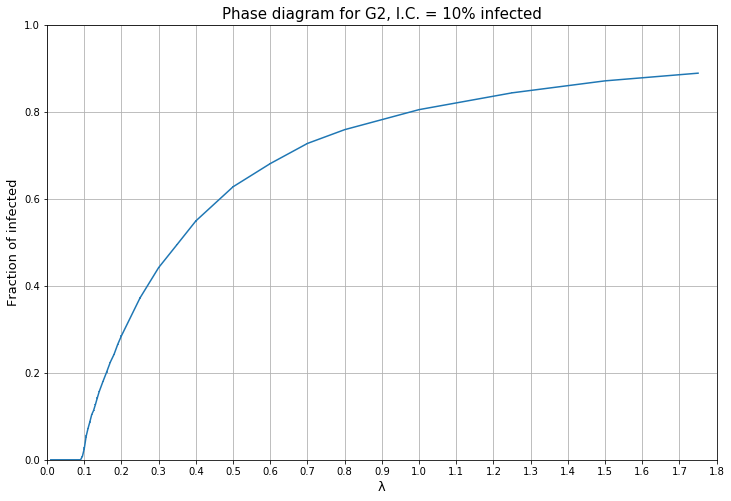

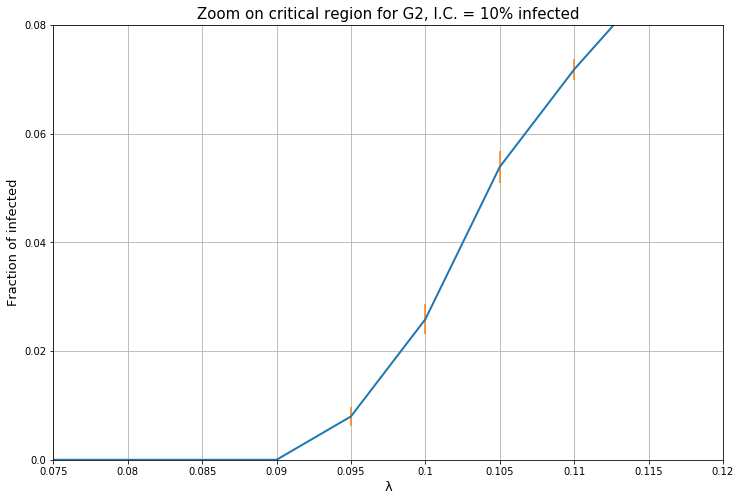

In [75]:
results1 = np.load("Temp_results/Graph2_100/vec_G2_100_10%_part1.npy")
results2 = np.load("Temp_results/Graph2_100/vec_G2_100_10%_part2.npy")
results3 = np.load("Temp_results/Graph2_100/vec_G2_100_10%_part3.npy")
results4 = np.load("Temp_results/Graph2_100/vec_G2_100_10%_part4.npy")

results_tot = np.concatenate([results1, results2, results3, results4])

λ_tot = np.array([0.01, 0.050, 0.075, 0.095, 0.115, 0.135, 0.170, 0.25, 0.5, 1.00,
                   0.02, 0.060, 0.080, 0.100, 0.120, 0.140, 0.180, 0.30, 0.6, 1.25,
                   0.03, 0.065, 0.085, 0.105, 0.125, 0.150, 0.190, 0.35, 0.7, 1.50,
                   0.04, 0.070, 0.090, 0.110, 0.130, 0.160, 0.200, 0.40, 0.8, 1.75])

results = np.zeros((40, 3))

for ele, l, lambd in zip(results, results_tot, λ_tot):   # results is build in appropriate way
    ele[0] = lambd
    ele[1] = np.mean(l)
    ele[2] = np.std(l)/10

results[:,1] = results[:,1][np.argsort(results[:,0])]
results[:,2] = results[:,2][np.argsort(results[:,0])]
results[:,0] = results[:,0][np.argsort(results[:,0])]

plt.figure(figsize=(12, 8))
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2])

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G2, I.C. = 10% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()


# ZOOM
plt.figure(figsize=(12, 8))
plt.plot(results[:,0], results[:,1], lw=2)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='none')

plt.xticks(λ_tot, labels = np.round(λ_tot, decimals = 3))
plt.yticks(np.linspace(0, 80, 5), labels = np.linspace(0, 0.08, 5))

plt.ylim([0, 80])
plt.xlim([0.075, 0.12])

plt.title("Zoom on critical region for G2, I.C. = 10% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

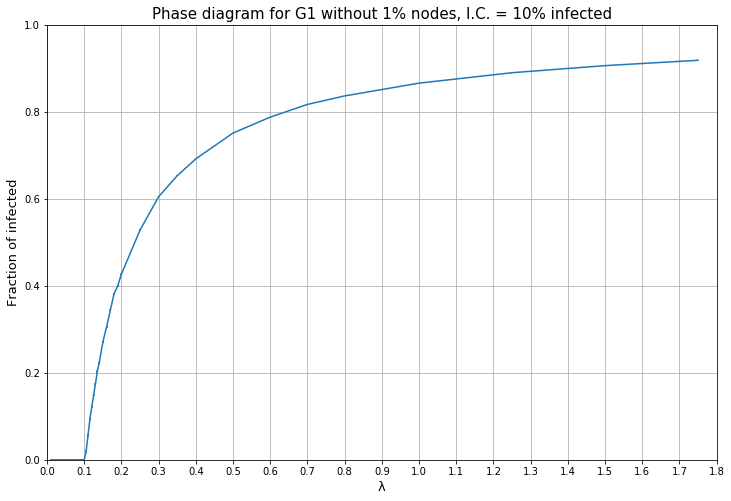

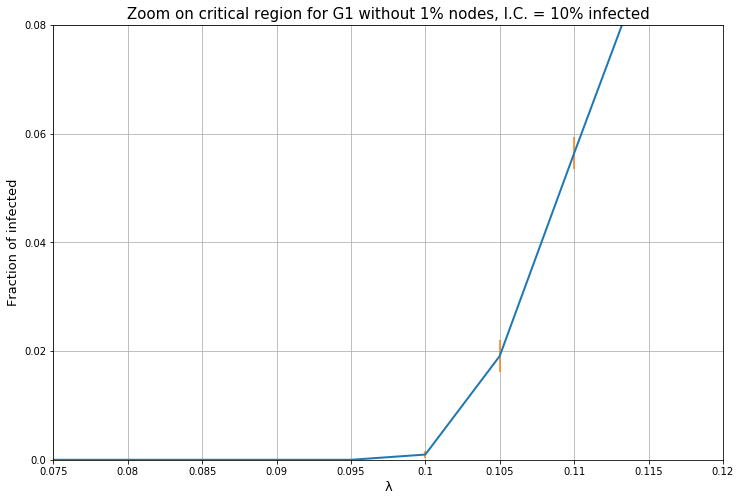

In [76]:
results1 = np.load("Temp_results/Graph1_100/vec_G1_t4_100_10%_part1.npy")
results2 = np.load("Temp_results/Graph1_100/vec_G1_t4_100_10%_part2.npy")
results3 = np.load("Temp_results/Graph1_100/vec_G1_t4_100_10%_part3.npy")
results4 = np.load("Temp_results/Graph1_100/vec_G1_t4_100_10%_part4.npy")

results_tot = np.concatenate([results1, results2, results3, results4])

λ_tot = np.array([0.01, 0.050, 0.075, 0.095, 0.115, 0.135, 0.170, 0.25, 0.5, 1.00,
                   0.02, 0.060, 0.080, 0.100, 0.120, 0.140, 0.180, 0.30, 0.6, 1.25,
                   0.03, 0.065, 0.085, 0.105, 0.125, 0.150, 0.190, 0.35, 0.7, 1.50,
                   0.04, 0.070, 0.090, 0.110, 0.130, 0.160, 0.200, 0.40, 0.8, 1.75])

results = np.zeros((40, 3))

for ele, l, lambd in zip(results, results_tot, λ_tot):   # results is build in appropriate way
    ele[0] = lambd
    ele[1] = np.mean(l)
    ele[2] = np.std(l)/10

results[:,1] = results[:,1][np.argsort(results[:,0])]
results[:,2] = results[:,2][np.argsort(results[:,0])]
results[:,0] = results[:,0][np.argsort(results[:,0])]

plt.figure(figsize=(12, 8))
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2])

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G1 without 1% nodes, I.C. = 10% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()


# ZOOM
plt.figure(figsize=(12, 8))
plt.plot(results[:,0], results[:,1], lw=2)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='none')

plt.xticks(λ_tot, labels = np.round(λ_tot, decimals = 3))
plt.yticks(np.linspace(0, 80, 5), labels = np.linspace(0, 0.08, 5))

plt.ylim([0, 80])
plt.xlim([0.075, 0.12])

plt.title("Zoom on critical region for G1 without 1% nodes, I.C. = 10% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

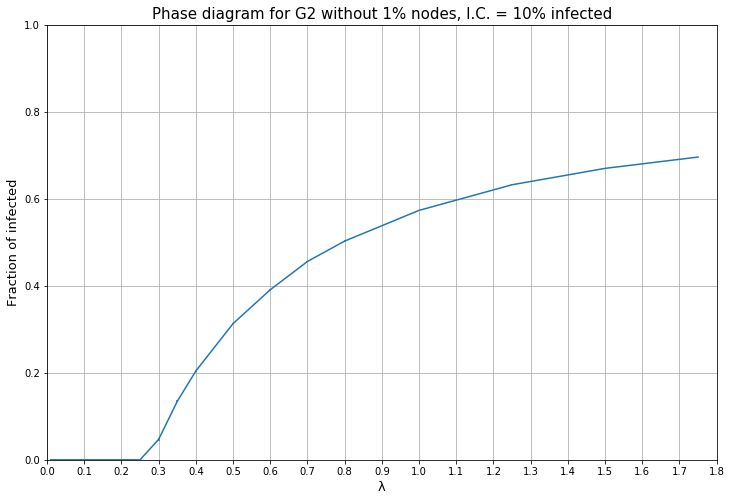

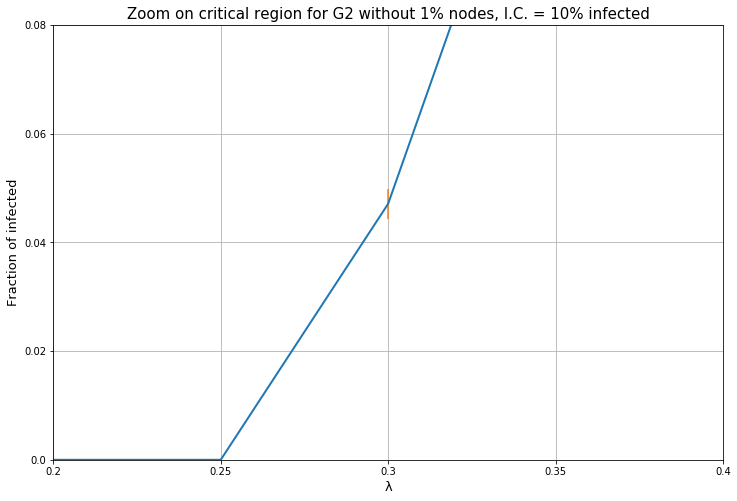

In [77]:
results1 = np.load("Temp_results/Graph2_100/vec_G2_t4_100_10%_part1.npy")
results2 = np.load("Temp_results/Graph2_100/vec_G2_t4_100_10%_part2.npy")
results3 = np.load("Temp_results/Graph2_100/vec_G2_t4_100_10%_part3.npy")
results4 = np.load("Temp_results/Graph2_100/vec_G2_t4_100_10%_part4.npy")

results_tot = np.concatenate([results1, results2, results3, results4])

λ_tot = np.array([0.01, 0.050, 0.075, 0.095, 0.115, 0.135, 0.170, 0.25, 0.5, 1.00,
                   0.02, 0.060, 0.080, 0.100, 0.120, 0.140, 0.180, 0.30, 0.6, 1.25,
                   0.03, 0.065, 0.085, 0.105, 0.125, 0.150, 0.190, 0.35, 0.7, 1.50,
                   0.04, 0.070, 0.090, 0.110, 0.130, 0.160, 0.200, 0.40, 0.8, 1.75])

results = np.zeros((40, 3))

for ele, l, lambd in zip(results, results_tot, λ_tot):   # results is build in appropriate way
    ele[0] = lambd
    ele[1] = np.mean(l)
    ele[2] = np.std(l)/10

results[:,1] = results[:,1][np.argsort(results[:,0])]
results[:,2] = results[:,2][np.argsort(results[:,0])]
results[:,0] = results[:,0][np.argsort(results[:,0])]

plt.figure(figsize=(12, 8))
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2])

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G2 without 1% nodes, I.C. = 10% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()


# ZOOM
plt.figure(figsize=(12, 8))
plt.plot(results[:,0], results[:,1], lw=2)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='none')

plt.xticks(λ_tot, labels = np.round(λ_tot, decimals = 3))
plt.yticks(np.linspace(0, 80, 5), labels = np.linspace(0, 0.08, 5))

plt.ylim([0, 80])
plt.xlim([0.2, 0.4])

plt.title("Zoom on critical region for G2 without 1% nodes, I.C. = 10% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

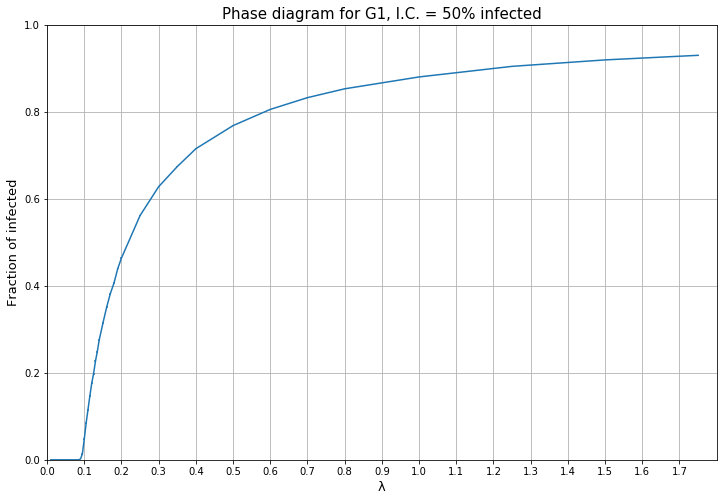

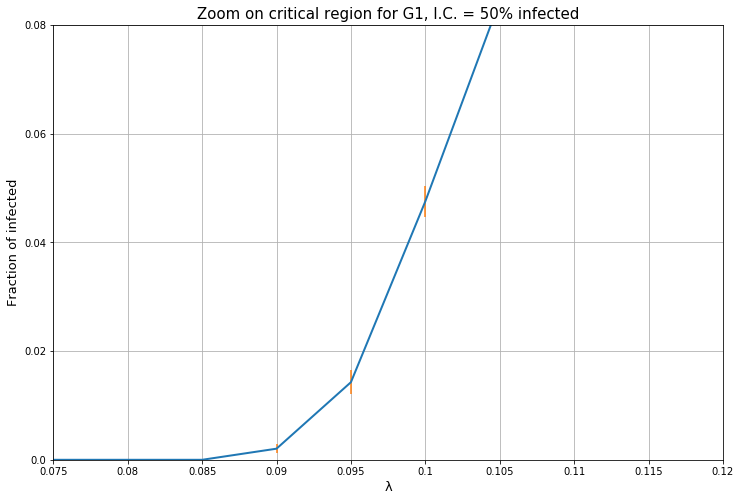

In [31]:
results1 = np.load("Temp_results/Graph1_100/vec_G1_100_50%_part1.npy")
results2 = np.load("Temp_results/Graph1_100/vec_G1_100_50%_part2.npy")
results3 = np.load("Temp_results/Graph1_100/vec_G1_100_50%_part3.npy")
results4 = np.load("Temp_results/Graph1_100/vec_G1_100_50%_part4.npy")

results_tot = np.concatenate([results1, results2, results3, results4])

λ_tot = np.array([0.01, 0.050, 0.075, 0.095, 0.115, 0.135, 0.170, 0.25, 0.5, 1.00,
                   0.02, 0.060, 0.080, 0.100, 0.120, 0.140, 0.180, 0.30, 0.6, 1.25,
                   0.03, 0.065, 0.085, 0.105, 0.125, 0.150, 0.190, 0.35, 0.7, 1.50,
                   0.04, 0.070, 0.090, 0.110, 0.130, 0.160, 0.200, 0.40, 0.8, 1.75])

results = np.zeros((40, 3))

for ele, l, lambd in zip(results, results_tot, λ_tot):   # results is build in appropriate way
    ele[0] = lambd
    ele[1] = np.mean(l)
    ele[2] = np.std(l)/10

results[:,1] = results[:,1][np.argsort(results[:,0])]
results[:,2] = results[:,2][np.argsort(results[:,0])]
results[:,0] = results[:,0][np.argsort(results[:,0])]

plt.figure(figsize=(12, 8))
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2])

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G1, I.C. = 50% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()


# ZOOM
plt.figure(figsize=(12, 8))
plt.plot(results[:,0], results[:,1], lw=2)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='none')

plt.xticks(λ_tot, labels = np.round(λ_tot, decimals = 3))
plt.yticks(np.linspace(0, 80, 5), labels = np.linspace(0, 0.08, 5))

plt.ylim([0, 80])
plt.xlim([0.075, 0.12])

plt.title("Zoom on critical region for G1, I.C. = 50% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

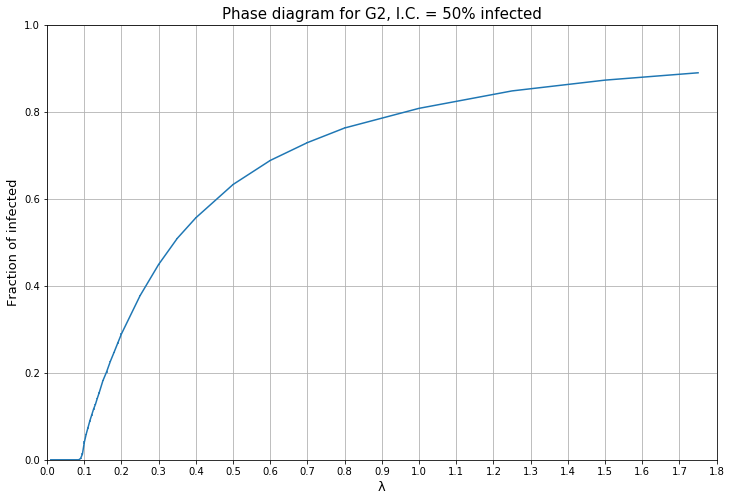

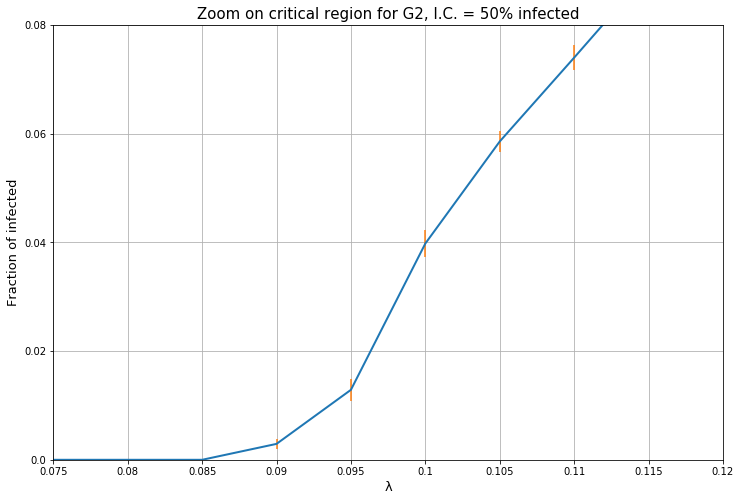

In [32]:
results1 = np.load("Temp_results/Graph2_100/vec_G2_100_50%_part1.npy")
results2 = np.load("Temp_results/Graph2_100/vec_G2_100_50%_part2.npy")
results3 = np.load("Temp_results/Graph2_100/vec_G2_100_50%_part3.npy")
results4 = np.load("Temp_results/Graph2_100/vec_G2_100_50%_part4.npy")

results_tot = np.concatenate([results1, results2, results3, results4])

λ_tot = np.array([0.01, 0.050, 0.075, 0.095, 0.115, 0.135, 0.170, 0.25, 0.5, 1.00,
                   0.02, 0.060, 0.080, 0.100, 0.120, 0.140, 0.180, 0.30, 0.6, 1.25,
                   0.03, 0.065, 0.085, 0.105, 0.125, 0.150, 0.190, 0.35, 0.7, 1.50,
                   0.04, 0.070, 0.090, 0.110, 0.130, 0.160, 0.200, 0.40, 0.8, 1.75])

results = np.zeros((40, 3))

for ele, l, lambd in zip(results, results_tot, λ_tot):   # results is build in appropriate way
    ele[0] = lambd
    ele[1] = np.mean(l)
    ele[2] = np.std(l)/10

results[:,1] = results[:,1][np.argsort(results[:,0])]
results[:,2] = results[:,2][np.argsort(results[:,0])]
results[:,0] = results[:,0][np.argsort(results[:,0])]

plt.figure(figsize=(12, 8))
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2])

plt.xticks(np.linspace(0, 1.80, 19 ), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G2, I.C. = 50% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()


# ZOOM
plt.figure(figsize=(12, 8))
plt.plot(results[:,0], results[:,1], lw=2)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='none')

plt.xticks(λ_tot, labels = np.round(λ_tot, decimals = 3))
plt.yticks(np.linspace(0, 80, 5), labels = np.linspace(0, 0.08, 5))

plt.ylim([0, 80])
plt.xlim([0.075, 0.12])

plt.title("Zoom on critical region for G2, I.C. = 50% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

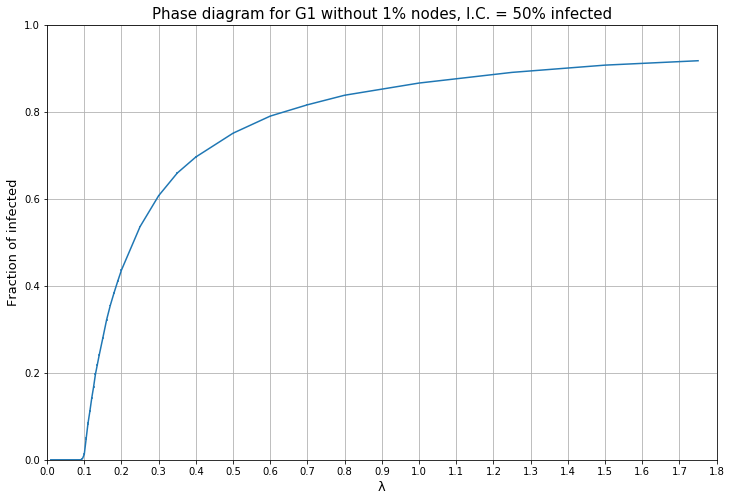

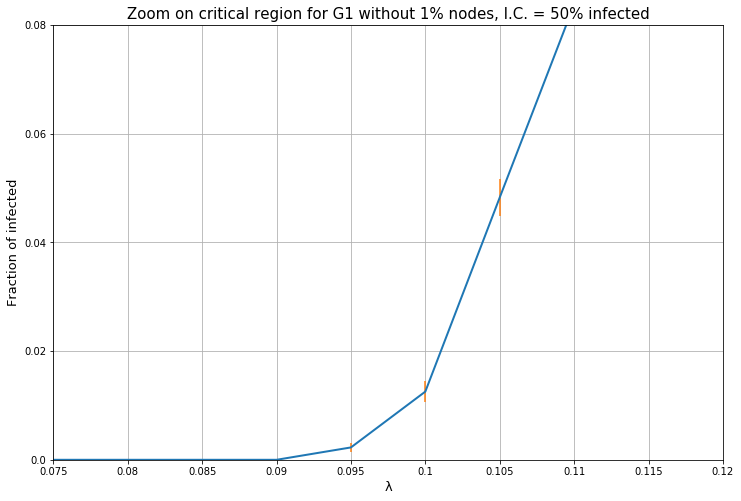

In [33]:
results1 = np.load("Temp_results/Graph1_100/vec_G1_t4_100_50%_part1.npy")
results2 = np.load("Temp_results/Graph1_100/vec_G1_t4_100_50%_part2.npy")
results3 = np.load("Temp_results/Graph1_100/vec_G1_t4_100_50%_part3.npy")
results4 = np.load("Temp_results/Graph1_100/vec_G1_t4_100_50%_part4.npy")

results_tot = np.concatenate([results1, results2, results3, results4])

λ_tot = np.array([0.01, 0.050, 0.075, 0.095, 0.115, 0.135, 0.170, 0.25, 0.5, 1.00,
                   0.02, 0.060, 0.080, 0.100, 0.120, 0.140, 0.180, 0.30, 0.6, 1.25,
                   0.03, 0.065, 0.085, 0.105, 0.125, 0.150, 0.190, 0.35, 0.7, 1.50,
                   0.04, 0.070, 0.090, 0.110, 0.130, 0.160, 0.200, 0.40, 0.8, 1.75])

results = np.zeros((40, 3))

for ele, l, lambd in zip(results, results_tot, λ_tot):   # results is build in appropriate way
    ele[0] = lambd
    ele[1] = np.mean(l)
    ele[2] = np.std(l)/10

results[:,1] = results[:,1][np.argsort(results[:,0])]
results[:,2] = results[:,2][np.argsort(results[:,0])]
results[:,0] = results[:,0][np.argsort(results[:,0])]

plt.figure(figsize=(12, 8))
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2])

plt.xticks(np.linspace(0, 1.80, 19), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G1 without 1% nodes, I.C. = 50% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()


# ZOOM
plt.figure(figsize=(12, 8))
plt.plot(results[:,0], results[:,1], lw=2)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='none')

plt.xticks(λ_tot, labels = np.round(λ_tot, decimals = 3))
plt.yticks(np.linspace(0, 80, 5), labels = np.linspace(0, 0.08, 5))

plt.ylim([0, 80])
plt.xlim([0.075, 0.12])

plt.title("Zoom on critical region for G1 without 1% nodes, I.C. = 50% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

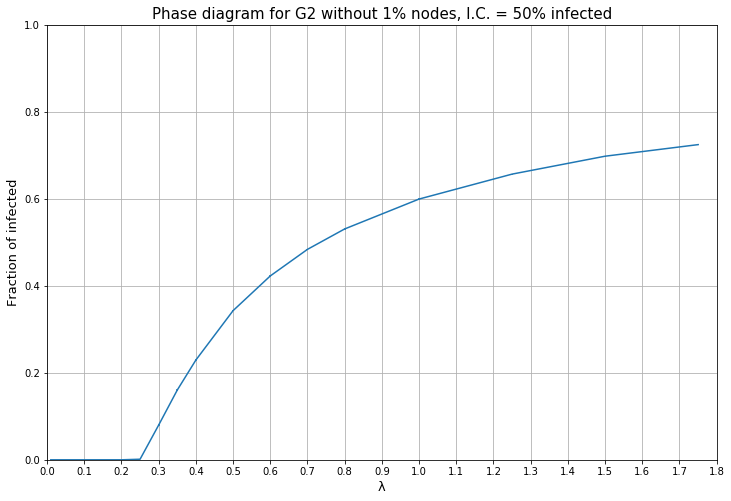

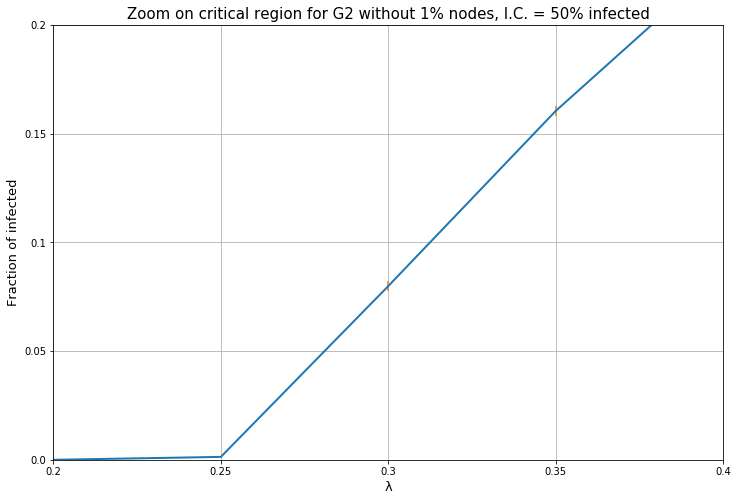

In [40]:
results1 = np.load("Temp_results/Graph2_100/vec_G2_t4_100_50%_part1.npy")
results2 = np.load("Temp_results/Graph2_100/vec_G2_t4_100_50%_part2.npy")
results3 = np.load("Temp_results/Graph2_100/vec_G2_t4_100_50%_part3.npy")
results4 = np.load("Temp_results/Graph2_100/vec_G2_t4_100_50%_part4.npy")

results_tot = np.concatenate([results1, results2, results3, results4])

λ_tot = np.array([0.01, 0.050, 0.075, 0.095, 0.115, 0.135, 0.170, 0.25, 0.5, 1.00,
                   0.02, 0.060, 0.080, 0.100, 0.120, 0.140, 0.180, 0.30, 0.6, 1.25,
                   0.03, 0.065, 0.085, 0.105, 0.125, 0.150, 0.190, 0.35, 0.7, 1.50,
                   0.04, 0.070, 0.090, 0.110, 0.130, 0.160, 0.200, 0.40, 0.8, 1.75])

results = np.zeros((40, 3))

for ele, l, lambd in zip(results, results_tot, λ_tot):   # results is build in appropriate way
    ele[0] = lambd
    ele[1] = np.mean(l)
    ele[2] = np.std(l)/10

results[:,1] = results[:,1][np.argsort(results[:,0])]
results[:,2] = results[:,2][np.argsort(results[:,0])]
results[:,0] = results[:,0][np.argsort(results[:,0])]

plt.figure(figsize=(12, 8))
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2])

plt.xticks(np.linspace(0, 1.80, 19), labels=np.round(np.linspace(0, 1.8, 19), decimals=3) )
plt.yticks(np.linspace(0, 1000, 6), labels = np.round(np.linspace(0, 1, 6), decimals = 3))

plt.ylim(np.array([0, 1000]))
plt.xlim([0, 1.8])

plt.title("Phase diagram for G2 without 1% nodes, I.C. = 50% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()
plt.show()


# ZOOM
plt.figure(figsize=(12, 8))
plt.plot(results[:,0], results[:,1], lw=2)
plt.errorbar(results[:,0], results[:,1], yerr=results[:,2], fmt='none')

plt.xticks(λ_tot, labels = np.round(λ_tot, decimals = 3))
plt.yticks(np.linspace(0, 200, 5), labels = np.round(np.linspace(0, 0.2, 5), decimals=3))

plt.ylim([0, 200])
plt.xlim([0.2, 0.4])

plt.title("Zoom on critical region for G2 without 1% nodes, I.C. = 50% infected", fontsize=15)
plt.xlabel("λ", fontsize=13)
plt.ylabel("Fraction of infected", fontsize=13)

plt.grid()

plt.show()

# Task 3

In [8]:
import collections

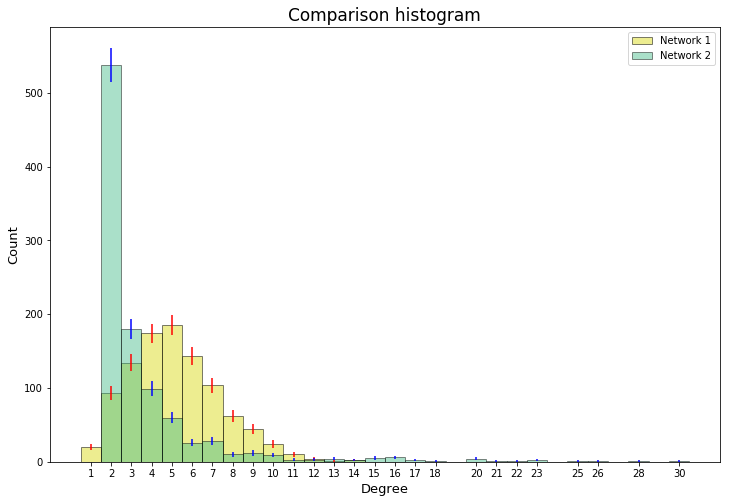

In [9]:
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True)  # degree sequence
#print ("Degree sequence", degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg1, cnt1 = zip(*degreeCount.items())

degree_sequence2 = sorted([d for n, d in G2.degree()], reverse=True)  # degree sequence
#print ("Degree sequence", degree_sequence)
degreeCount2 = collections.Counter(degree_sequence2)
deg2, cnt2 = zip(*degreeCount2.items())

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(deg1, cnt1, width=1.0, color='#dddd22', edgecolor='k', label='Network 1', alpha=0.5)
plt.bar(deg2, cnt2, width=1.0, edgecolor = 'k', alpha=0.45, color='#44bb88', label='Network 2')
plt.errorbar(deg1, cnt1, yerr=np.sqrt(cnt1), fmt='none', c='r')
plt.errorbar(deg2, cnt2, yerr=np.sqrt(cnt2), fmt='none', c='b')
tick1 = np.array(deg1)
tick2 = np.array(deg2)
tick = np.concatenate( (tick1, tick2), axis = None)
tick = np.unique(tick)
plt.title("Comparison histogram", fontsize = 17)
plt.ylabel("Count", fontsize=13)
plt.xlabel("Degree", fontsize=13)
ax.set_xticks([d for d in tick])
ax.set_xticklabels(tick)
plt.legend()
plt.show()

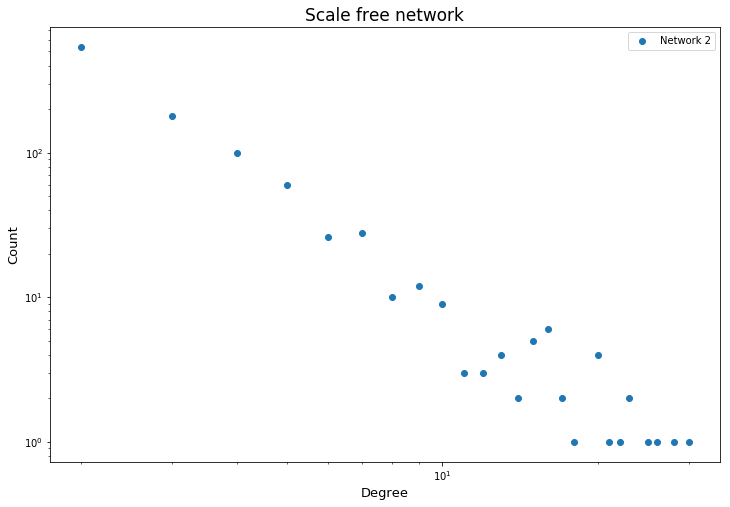

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(deg2, cnt2, label='Network 2')
ax.set_xscale('log')
ax.set_yscale('log')

plt.title("Scale free network", fontsize = 17)
plt.ylabel("Count", fontsize=13)
plt.xlabel("Degree", fontsize=13)

plt.legend()
plt.show()

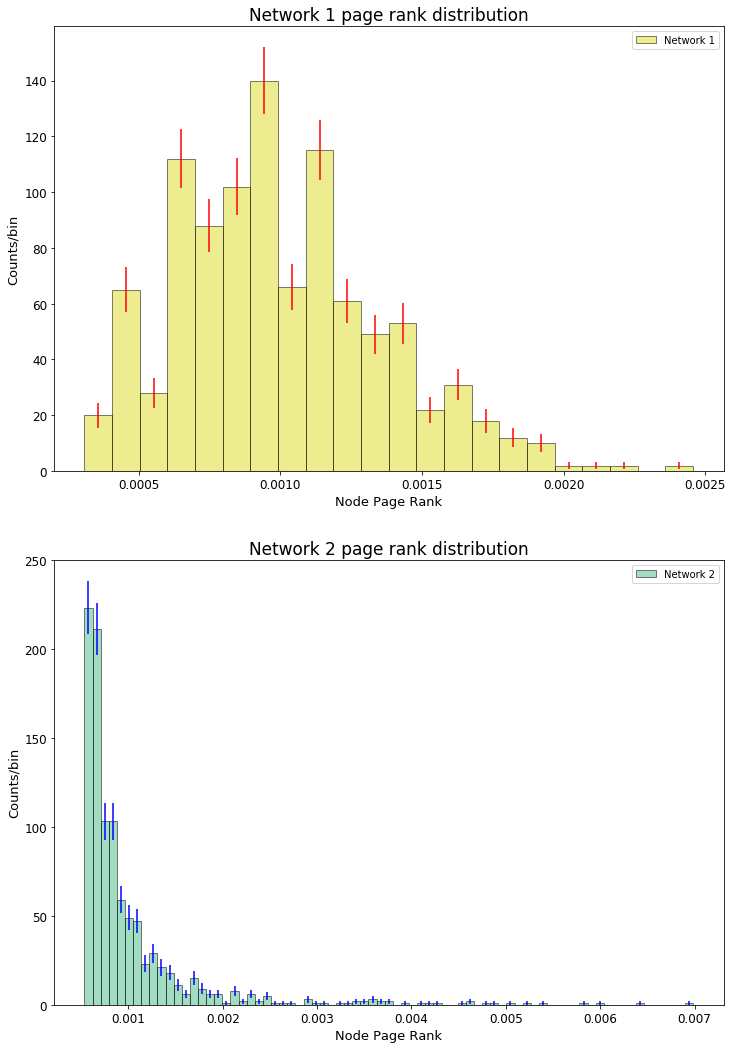

In [43]:
fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 18))
page1=np.array(list(nx.pagerank(G1).values()))
page2=np.array(list(nx.pagerank(G2).values()))


# setting bins for hist 1
q1_1 = np.percentile(page1, 25)
q3_1 = np.percentile(page1, 75)

n_1 = len(page1)**(.1/.3)
rng_1 = max(page1) - min(page1)
iqr_1 = 2*(q3_1-q1_1)
bins_1 =int((n_1*rng_1)/iqr_1)

# setting bins for hist 2
q1_2 = np.percentile(page2, 25)
q3_2 = np.percentile(page2, 75)

n_2 = len(page2)**(.1/.3)
rng_2 = max(page2) - min(page2)
iqr_2 = 2*(q3_2-q1_2)
bins_2 =int((n_2*rng_2)/iqr_2)


# plotting
y1, edges1, _ = ax1.hist(page1, rwidth=1, alpha=0.5, label='Network 1',color='#dddd22', bins=bins_1, edgecolor='k')
y2, edges2, _ = ax2.hist(page2, rwidth=1, alpha=0.5, label='Network 2',color='#44bb88', bins=bins_2, edgecolor='k')
bin_centers_1 = 0.5 * (edges1[:-1] + edges1[1:])
bin_centers_2 = 0.5 * (edges2[:-1] + edges2[1:])
ax1.errorbar(bin_centers_1, y1, yerr=np.sqrt(y1), fmt='none', c='r')
ax2.errorbar(bin_centers_2, y2, yerr=np.sqrt(y2), fmt='none', c='b')

ax1.set_title("Network 1 page rank distribution", fontsize=17)
ax2.set_title("Network 2 page rank distribution", fontsize=17)

ax1.set_xlabel("Node Page Rank", fontsize = 13)
ax1.set_ylabel("Counts/bin", fontsize = 13)
ax2.set_xlabel("Node Page Rank", fontsize = 13)
ax2.set_ylabel("Counts/bin", fontsize = 13)

# setting ticks fontsize
ticks_size = 12
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(ticks_size)
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(ticks_size)È
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(ticks_size)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(ticks_size)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 15)
#ax1.xaxis.get_major_ticks()
#ax2.set_xticks(fontsize = 15)
#ax2.set_yticks(fontsize = 15)

ax1.legend()
ax2.legend()
plt.show()

In [44]:
print('the clustering coefficient of network 1:',nx.transitivity(G1))
print('the clustering coefficient of network 2:',nx.transitivity(G2))

the clustering coefficient of network 1: 0.003865979381443299
the clustering coefficient of network 2: 0.011056878175117043


# TASK 4

In [46]:
G1_t4 = G1.copy()
G2_t4 = G2.copy()

page1_d = dict(nx.pagerank(G1))
page2_d = dict(nx.pagerank(G2))

one_pc_page1 = np.percentile(page1, 99)
one_pc_page2 = np.percentile(page2, 99)

indexes_to_delete1 = np.where(page1>=one_pc_page1)
indexes_to_delete2 = np.where(page2>=one_pc_page2)

### N.B.: the following cell MUST BE RUN ONLY ONCE, otherwise some errors will arise

In [47]:
for node in indexes_to_delete1[0]:
    G1_t4.remove_node(node)

for node in indexes_to_delete2[0]:
    G2_t4.remove_node(node)

In [59]:
print("G1 initial edges:", len(G1.edges()))
print("G1 edges after 1% highest page rank nodes:", len(G1_t4.edges()))

print("~" + str( np.round(100*(len(G1.edges())-len(G1_t4.edges())) / len(G1.edges()), decimals=3) )
      + "% edges 'lost' for G1\n")

print("G1 initial edges:", len(G2.edges()))
print("G2 edges after 1% highest page rank nodes:", len(G2_t4.edges()))

print("~" + str( np.round(100*(len(G2.edges())-len(G2_t4.edges())) / len(G2.edges()), decimals=3) )
      + "% edges 'lost' for G2")


G1 initial edges: 2573
G1 edges after 1% highest page rank nodes: 2453
~4.664% edges 'lost' for G1

G1 initial edges: 1796
G2 edges after 1% highest page rank nodes: 1565
~12.862% edges 'lost' for G2


### Re-evaluating the expected quantities for the new graphs

In [60]:
net1_t4 = nx.to_numpy_matrix(G1_t4)
net2_t4 = nx.to_numpy_matrix(G2_t4)


#deg1 = np.array(G1.degree())[:,1]
deg1_t4 = np.array(G1_t4.degree())
deg2_t4 = np.array(G2_t4.degree())

k1_avg_t4    = np.mean(deg1_t4[:,1])
k1_sq_avg_t4 = np.mean(deg1_t4[:,1]**2)

k2_avg_t4    = np.mean(deg2_t4[:,1])
k2_sq_avg_t4 = np.mean(deg2_t4[:,1]**2)

µ = 0.5


# Homogeneous case
λ1_c_ho_t4 = µ/k1_avg_t4
λ2_c_ho_t4 = µ/k2_avg_t4

# Heterogeneous case
λ1_c_he_t4 = µ*k1_avg_t4/k1_sq_avg_t4
λ2_c_he_t4 = µ*k2_avg_t4/k2_sq_avg_t4

# Quenced case

# Evaluating eigenvalues
max_eig_1_t4 = np.real(max(np.linalg.eigvals(net1_t4)))
max_eig_2_t4 = np.real(max(np.linalg.eigvals(net2_t4)))

λ1_c_qu_t4 = µ/max_eig_1_t4
λ2_c_qu_t4 = µ/max_eig_2_t4

print("Net1, homogeneous case:\t\t", λ1_c_ho_t4)
print("Net2, homogeneous case:\t\t", λ2_c_ho_t4)
print("\nNet1, heterogeneous case:\t", λ1_c_he_t4)
print("Net2, heterogeneous case:\t", λ2_c_he_t4)
print("\nNet1, quenched case:\t\t", λ1_c_qu_t4)
print("Net2, quenched case:\t\t", λ2_c_qu_t4)

Net1, homogeneous case:		 0.10089686098654709
Net2, homogeneous case:		 0.15814696485623003

Net1, heterogeneous case:	 0.0851854424225587
Net2, heterogeneous case:	 0.09848961611076149

Net1, quenched case:		 0.08320391933280033
Net2, quenched case:		 0.08293502696222815


### N.B.: results of this section are already showed in section "Task 2" in which we reported all comparison between the graph

# Task 5

/home/tommaso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/tommaso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tommaso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/home/tommaso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


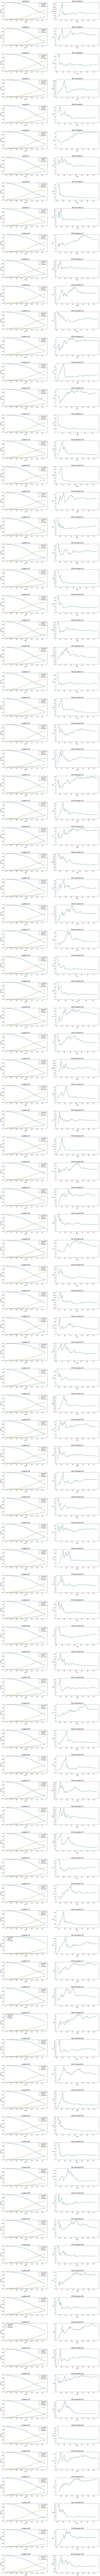

In [61]:
def R0(t, frac_S, frac_I, frac_R):
    beta=-(frac_S[t-1]-frac_S[0])/(sum(frac_S[:t]*frac_I[:t]))
    gamma=frac_R[t-1]/(sum(frac_I[:t]))
    return(beta/gamma)


fig, ax = plt.subplots(100, 2, figsize=(18,500))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
for i in range(100):
    ax[i, 0].plot(np.array(df[df['location_id']==i+1]['frac_S']), label='Suscettible')
    ax[i, 0].plot(np.array(df[df['location_id']==i+1]['frac_I']), label='Infected')
    ax[i, 0].plot(np.array(df[df['location_id']==i+1]['frac_R']), label='Recovered')
    ax[i, 0].set_title("Location " + str(i+1), fontsize = 15)
    ax[i, 0].set_xlabel('time')
    ax[i, 0].set_ylabel('fraction')
    ax[i, 0].set_ylim([0, 1])
    ax[i, 0].legend()

    R0_timelist=np.zeros(77)
    
    frac_S=np.array(df[df['location_id']==i+1]['frac_S'])
    frac_I=np.array(df[df['location_id']==i+1]['frac_I'])
    frac_R=np.array(df[df['location_id']==i+1]['frac_R'])

    R0_timelist=np.zeros(77)
    for j in range(77):
        R0_timelist[j]=R0(j, frac_S, frac_I, frac_R)

    ax[i, 1].set_title("R0 of location " + str(i+1), fontsize = 15)
    ax[i, 1].plot(np.arange(0,77), R0_timelist)
    ax[i, 1].set_xlabel('time')
    ax[i, 1].set_ylabel('R0')
    
    ax[i, 1].set_ylim(bottom=0)
    
plt.show()

The average value of R0 is: 7.771564124968369
The stardard deviation of R0 is: 0.6655055218325026


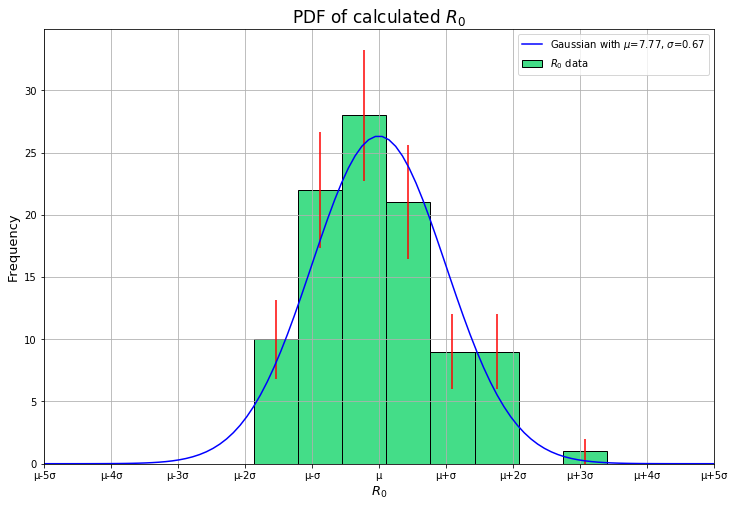

In [62]:

R0_list=np.zeros(100)

for i in range(100):
    frac_S=np.array(df[df['location_id']==i+1]['frac_S'])
    frac_I=np.array(df[df['location_id']==i+1]['frac_I'])
    frac_R=np.array(df[df['location_id']==i+1]['frac_R'])
    R0_list[i]=R0(len(df[df['location_id']==i+1]), frac_S, frac_I, frac_R)
    
    
mu=np.mean(R0_list)
sigma=np.std(R0_list)
print('The average value of R0 is:', mu)
print('The stardard deviation of R0 is:', sigma)

import scipy.stats as stats

plt.figure(figsize=(12,8))

q1 = np.percentile(R0_list, 25)
q3 = np.percentile(R0_list, 75)

n = len(R0_list)**(.1/.3)
rng = max(R0_list) - min(R0_list)
iqr = 2*(q3-q1)
bins =int((n*rng)/iqr)



entries, edges, _ =plt.hist(R0_list,bins=bins,  rwidth=1, color='#44dd88', edgecolor='k', label='$R_0$ data')
densities= np.sum(entries)*((max(edges)-min(edges))/bins)
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.sqrt(entries), fmt='none', c='r')


x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
x_interv = np.linspace(mu - 5*sigma, mu + 5*sigma, 11)
labels_x = ["µ-5σ", "µ-4σ", "µ-3σ", "µ-2σ", "µ-σ", "µ", "µ+σ", "µ+2σ", "µ+3σ", "µ+4σ", "µ+5σ"]
plt.plot(x, densities*stats.norm.pdf(x, mu, sigma), c='b', label='Gaussian with $\mu$=%.2f, $\sigma$=%.2f' %(mu, sigma))

plt.xlabel('$R_0$', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('PDF of calculated $R_0$', fontsize=17)

plt.xticks(x_interv, labels=labels_x)

plt.xlim(mu - 5*sigma, mu + 5*sigma)
plt.legend()
plt.grid()
plt.show()

# Appendix: doing simulations

To be able to do more simulations we decided to split each of them in 4 pieces and run them simultaneously on our computer. The pieces are different in λs they simulated, files they saved and graph they used, so here we copy only 1 script and then we write the different parameters used in the different pieces.

### 1 infected

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from functools import reduce
from numba import jit
import networkx as nx

df=pd.read_csv("cases_100locations_first77days.txt", delimiter=' ')
df1=pd.read_csv("net1.txt", delimiter=' ', header=None)
df2=pd.read_csv("net2.txt", delimiter=' ', header=None)

# building adjacency matrix 1
net1 = np.zeros(shape=(max(df1[1])+1, max(df1[1]+1 )), dtype='int32')
for i1,i2 in zip(df1[0],df1[1]):
    net1[i1][i2] = 1
    net1[i2][i1] = 1

# building adjacency matrix 2
net2 = np.zeros(shape=(max(df2[1])+1, max(df2[1]+1 )), dtype='int32')
for i1,i2 in zip(df2[0],df2[1]):
    net2[i1][i2] = 1
    net2[i2][i1] = 1
    # net2 is explitely symmetric

G1 = nx.from_numpy_matrix(net1)
G2 = nx.from_numpy_matrix(net2)

µ = 0.5

λ_vec = np.linspace(0.01, 0.20, 20)

def possible_infection_contacts(prova, G1):
    possible = []
    for edge in G1.edges:
        #print(edge)
        if (prova[edge[0]] != prova[edge[1]]):
            possible.append(edge)
    return possible


def my_func(λ_test=1, cycles=20):
    my_SIS = np.zeros(1000) # creating environment

    avg_I_list = []

    config_list = []
    time_list = []
    I_list=[]

    # Initializing with a random infected
    my_SIS[np.random.choice(np.arange(len(my_SIS)))] = 1

    cicle = 0
    
    for cicle in range(cycles):
        print("Progress:", cicle)    
        config_list = []
        time_list = [0]
        I_list=[]
        my_SIS = np.zeros(1000) # creating environment
        my_SIS[np.random.choice(np.arange(len(my_SIS)))] = 1
        
        config_list.append(my_SIS.copy())

        while(np.sum(my_SIS) != 0):
            # getting all possible infectious events
            possible_infect = possible_infection_contacts(my_SIS, G2)    # <--------- Here one can change the graph: G1, G2

            #print(possible_infect)

            a_λ = λ_test*len(possible_infect)  # evaluating the propensity rate of infection
            a_µ = µ * np.sum(my_SIS)           # evaluating the propensity rate of getting healed

            a_0 = a_λ + a_µ                    # total propensity rate

            # Time of next episode
            δt_Gill = np.random.exponential(scale = 1/a_0)

            # chosing who change
            choice = np.random.uniform(low = 0.0, high = a_0)

            if (choice < a_λ):
                # selecting one edge
                infect_edge = np.random.randint(low = 0, high = len(possible_infect))
                # infecting both nodes of the edge (one is already infected, so we are infecting only 1 new individual)
                my_SIS[possible_infect[infect_edge][0]] = 1
                my_SIS[possible_infect[infect_edge][1]] = 1
            else:
                # 1 infected getting heal
                my_SIS[np.random.choice(np.nonzero(my_SIS)[0])] = 0

            # fraction of infected I=np.sum(np.nonzero(my_SIS))
            I_list.append(np.sum(np.nonzero(my_SIS)[0]))
            config_list.append(my_SIS.copy())
            time_list.append(δt_Gill)

            if len(I_list)>2000:
                if (( np.mean(I_list[-2001:-1]) - np.mean(I_list[-2000]) ) < 0.1):
                    my_SIS = np.zeros(1000)

        avg_I_list.append(np.sum(config_list[-100:])/100)
        
    
    return avg_I_list


λ_list = np.array([0.01, 0.05, 0.075, 0.095, 0.115, 0.135, 0.16, 0.2, 0.28, 0.36, 0.44, 0.53, 0.64, 0.76, 0.88, 1.0])
#λ_list = np.array([0.02, 0.06, 0.08, 0.1, 0.12, 0.14, 0.17, 0.22, 0.30, 0.38, 0.46, 0.56, 0.67, 0.79, 0.91, 1.25])
#λ_list = np.array([0.03, 0.065, 0.085, 0.105, 0.125, 0.145, 0.18, 0.24, 0.32, 0.40, 0.48, 0.59, 0.70, 0.82, 0.94, 1.5])
#λ_list = np.array([0.04, 0.07, 0.09, 0.11, 0.13, 0.15, 0.19, 0.26, 0.34, 0.42, 0.5, 0.61, 0.73, 0.85, 0.97, 1.75])

res_list = []
for λ_ele in λ_list:
    res_list.append(my_func(λ_ele, 100))
print(res_list)

res_list_array=np.array(res_list)

mean_list=np.mean(res_list_array, axis=1)
std_list=np.std(res_list_array, axis=1)
max_g = np.max(res_list_array, axis=1)
min_g = np.min(res_list_array, axis=1)
this_results = np.array([λ_list, mean_list, std_list, max_g, min_g])
np.savetxt("Temp_results/Graph2_100/vec4_100_thr", res_list_array)       # <----- Here one can change the files in which save the data
np.savetxt("Temp_results/Graph2_100/res4_100", this_results.T)           # <----- Here one can change the files in which save the data

### 1 infected, task4 (removing 1% nodes)

Unfortunately here we decided to change our "style" for scipts to be able to gain more time...
The main idea is always the same and the characteristics of the scripts do not change too much with respect to the previous ones...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from functools import reduce
from numba import jit
import networkx as nx

df=pd.read_csv("cases_100locations_first77days.txt", delimiter=' ')
df1=pd.read_csv("net1.txt", delimiter=' ', header=None)
df2=pd.read_csv("net2.txt", delimiter=' ', header=None)

# building adjacency matrix 1
net1 = np.zeros(shape=(max(df1[1])+1, max(df1[1]+1 )), dtype='int32')
for i1,i2 in zip(df1[0],df1[1]):
    net1[i1][i2] = 1
    net1[i2][i1] = 1

# building adjacency matrix 2
net2 = np.zeros(shape=(max(df2[1])+1, max(df2[1]+1 )), dtype='int32')
for i1,i2 in zip(df2[0],df2[1]):
    net2[i1][i2] = 1
    net2[i2][i1] = 1
    # net2 is explitely symmetric

G1 = nx.from_numpy_matrix(net1)
G2 = nx.from_numpy_matrix(net2)

page1=np.array(list(nx.pagerank(G1).values()))
page2=np.array(list(nx.pagerank(G2).values()))

G1_t4 = G1.copy()
G2_t4 = G2.copy()

one_pc_page1 = np.percentile(page1, 99)
one_pc_page2 = np.percentile(page2, 99)

indexes_to_delete1 = np.where(page1>=one_pc_page1)
indexes_to_delete2 = np.where(page2>=one_pc_page1)

for node in indexes_to_delete1[0]:
    G1_t4.remove_node(node)

for node in indexes_to_delete2[0]:
    G2_t4.remove_node(node)


µ = 0.5

λ_vec = np.linspace(0.01, 0.20, 20)

def possible_infection_contacts(prova, G1):
    possible = []
    for edge in G1.edges:
        #print(edge)
        if (prova[edge[0]] != prova[edge[1]]):
            possible.append(edge)
    return possible


def my_func(λ_test=1, cycles=20):
    my_SIS = np.zeros(1000) # creating environment

    print(λ_test)

    avg_I_list = []

    config_list = []
    time_list = []
    I_list=[]

    # Initializing with a random infected
    my_SIS[np.random.choice(np.arange(len(my_SIS)))] = 1

    cicle = 0

    for cicle in range(cycles):
        config_list = []
        time_list = [0]
        I_list=[]
        my_SIS = np.zeros(1000) # creating environment
        my_SIS[np.random.choice(np.arange(len(my_SIS)))] = 1
        
        config_list.append(my_SIS.copy())

        while(np.sum(my_SIS) != 0):
            # getting all possible infectious events
            possible_infect = possible_infection_contacts(my_SIS, G1_t4)   # <----- changing graph

            #print(possible_infect)

            a_λ = λ_test*len(possible_infect)  # evaluating the propensity rate of infection
            a_µ = µ * np.sum(my_SIS)           # evaluating the propensity rate of getting healed

            a_0 = a_λ + a_µ                    # total propensity rate

            # Time of next episode
            δt_Gill = np.random.exponential(scale = 1/a_0)

            # chosing who change
            choice = np.random.uniform(low = 0.0, high = a_0)

            if (choice < a_λ):
                # selecting one edge
                infect_edge = np.random.randint(low = 0, high = len(possible_infect))
                # infecting both nodes of the edge (one is already infected, so we are infecting only 1 new individual)
                my_SIS[possible_infect[infect_edge][0]] = 1
                my_SIS[possible_infect[infect_edge][1]] = 1
            else:
                # 1 infected getting heal
                my_SIS[np.random.choice(np.nonzero(my_SIS)[0])] = 0

            # fraction of infected I=np.sum(np.nonzero(my_SIS))
            I_list.append(np.sum(np.nonzero(my_SIS)[0]))
            config_list.append(my_SIS.copy())
            time_list.append(δt_Gill)

            if len(I_list)>2000:
                if (( np.mean(I_list[-2001:-1]) - np.mean(I_list[-2000]) ) < 0.1):
                    my_SIS = np.zeros(1000)

        avg_I_list.append(np.sum(config_list[-100:])/100)
        
    
    return avg_I_list


λ_list = np.array([0.01, 0.05, 0.075, 0.095, 0.115, 0.135, 0.16, 0.2, 0.28, 0.36, 0.44, 0.53, 0.64, 0.76, 0.88, 1.0, 0.02, 0.06, 0.08, 0.1, 0.12, 0.14, 0.17, 0.22, 0.30, 0.38, 0.46, 0.56, 0.67, 0.79, 0.91, 1.25])
# λ_list = np.array([0.03, 0.065, 0.085, 0.105, 0.125, 0.145, 0.18, 0.24, 0.32, 0.40, 0.48, 0.59, 0.70, 0.82, 0.94, 1.5, 0.04, 0.07, 0.09, 0.11, 0.13, 0.15, 0.19, 0.26, 0.34, 0.42, 0.5, 0.61, 0.73, 0.85, 0.97, 1.75])

res_list = []
for λ_ele in λ_list:
    res_list.append(my_func(λ_ele, 100))
print(res_list)

res_list_array=np.array(res_list)

mean_list=np.mean(res_list_array, axis=1)
std_list=np.std(res_list_array, axis=1)
max_g = np.max(res_list_array, axis=1)
min_g = np.min(res_list_array, axis=1)
this_results = np.array([λ_list, mean_list, std_list, max_g, min_g])
np.savetxt("Temp_results/Graph1_100/vec1_100_thr_t4", res_list_array)    # <----- changing files
np.savetxt("Temp_results/Graph1_100/res1_100_t4", this_results.T)        # <----- changing files

### initial condition: 10% infected

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from numba import jit
import networkx as nx

%precision 5

df=pd.read_csv("cases_100locations_first77days.txt", delimiter=' ')
df1=pd.read_csv("net1.txt", delimiter=' ', header=None)
df2=pd.read_csv("net2.txt", delimiter=' ', header=None)

# building adjacency matrix 1
net1 = np.zeros(shape=(max(df1[1])+1, max(df1[1]+1 )), dtype='int32')
for i1,i2 in zip(df1[0],df1[1]):
    net1[i1][i2] = 1
    net1[i2][i1] = 1

# building adjacency matrix 2
net2 = np.zeros(shape=(max(df2[1])+1, max(df2[1]+1 )), dtype='int32')
for i1,i2 in zip(df2[0],df2[1]):
    net2[i1][i2] = 1
    net2[i2][i1] = 1
    # net2 is explitely symmetric

G1 = nx.from_numpy_matrix(net1)
G2 = nx.from_numpy_matrix(net2)

G1_t4 = G1.copy()
G2_t4 = G2.copy()

page1=np.array(list(nx.pagerank(G1).values()))
page2=np.array(list(nx.pagerank(G2).values()))

one_pc_page1 = np.percentile(page1, 99)
one_pc_page2 = np.percentile(page2, 99)

indexes_to_delete1 = np.where(page1>=one_pc_page1)
indexes_to_delete2 = np.where(page2>=one_pc_page1)

for node in indexes_to_delete1[0]:
    G1_t4.remove_node(node)

for node in indexes_to_delete2[0]:
    G2_t4.remove_node(node)


µ = 0.5


def possible_infection_contacts(prova, G):
    possible = []
    for edge in G.edges:
        #print(edge)
        if (prova[edge[0]] != prova[edge[1]]):
            possible.append(edge)
    return possible    


def my_func(G, λ_test=1, cycles=5):               # <----- Redefined the function to be able to insert the graph as a parameter
    my_SIS = np.zeros(1000) # creating environment

    avg_I_list = []

    cicle = 0

    for cicle in range(cycles):
    #while(len(config_list) < 10):
    
        config_list = []
        time_list = [0]
        I_list=[]
        my_SIS = np.zeros(1000) # creating environment
        
        # Initializing with a random infected
        my_SIS[np.random.choice(np.arange(len(my_SIS)), size = 100, replace=False)] = 1   # <----- picking 100 infected among 1000
                                                                                    # N.B.: TO LAUNCH 50% INFECTED ONE CAN SIMPLY
                                                                                    #       CHANGE THE PARAMETER HERE, TO BE 500
        
        config_list.append(my_SIS.copy())

        flag = True
        
        my_count = 0
        
        #for my_count in range(10000):
        while ( (my_count<5000) and (flag) ):
            my_count += 1
            # getting all possible infectious events
            possible_infect = possible_infection_contacts(my_SIS, G)

            #print(possible_infect)

            a_λ = λ_test*len(possible_infect)  # evaluating the propensity rate of infection
            a_µ = µ * np.sum(my_SIS)           # evaluating the propensity rate of getting healed

            a_0 = a_λ + a_µ                    # total propensity rate

            # Time of next episode
            #δt_Gill = np.random.exponential(scale = 1/a_0)

            # chosing who change
            choice = np.random.uniform(low = 0.0, high = a_0)

            if (choice < a_λ):
                # selecting one edge
                infect_edge = np.random.randint(low = 0, high = len(possible_infect))
                # infecting both nodes of the edge (one is already infected, so we are infecting only 1 new individual)
                my_SIS[possible_infect[infect_edge][0]] = 1
                my_SIS[possible_infect[infect_edge][1]] = 1
            else:
                # 1 infected getting heal
                my_SIS[np.random.choice(np.nonzero(my_SIS)[0])] = 0

            # fraction of infected I=np.sum(np.nonzero(my_SIS))
            I_list.append(np.sum(np.nonzero(my_SIS)[0]))
            config_list.append(my_SIS.copy())
            #time_list.append(δt_Gill)
            
            if (np.sum(my_SIS) == 0):
                flag = False



        if (np.sum(my_SIS) == 0):
            avg_I_list.append(0)
        else:
            avg_I_list.append(np.sum(config_list[-1000:])/1000)

        my_time = []
        for index in range(len(time_list)):
            my_time.append(np.sum(time_list[:index+1]))

    return avg_I_list

λ_list = np.array([0.01, 0.050, 0.075, 0.095, 0.115, 0.135, 0.170, 0.25, 0.5, 1.00])
#λ_list = np.array([0.02, 0.060, 0.080, 0.100, 0.120, 0.140, 0.180, 0.30, 0.6, 1.25])
#λ_list = np.array([0.03, 0.065, 0.085, 0.105, 0.125, 0.150, 0.190, 0.35, 0.7, 1.50])
#λ_list = np.array([0.04, 0.070, 0.090, 0.110, 0.130, 0.160, 0.200, 0.40, 0.8, 1.75])

res_list = []
for λ_ele in λ_list:
    res_list.append(my_func(G1, λ_ele, 100))      # <----- changin the graph to analyze

np.save("Temp_results/Graph1_100/vec_G1_100_10%_part1", res_list)     # <----- changing file names: "part1", "part2", etc.